In [6]:
import pandas as pd

import numpy as np

### Today's covered topics

- multindex

- unstack and stack

- pivot

- melt

#### Series is 1D and DataFrames are 2D objects

- But why?
- And what exactly is index?

In [7]:
## if we want to access anything from series we need index
# in series we want to access information then we need to give one information

## while accesing items from dataframe we need to give two pieces of information



In [8]:
# can we have multiple index? Let's try
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
a = pd.Series([1,2,3,4,5,6,7,8],index=index_val)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [9]:
# here above we make index_val as index

# how we can access
# The problem?
# here is of we want to access the data we need to provide the two data

a[('cse' , 2022)]

4

In [10]:
# what if we want access the data only on the basis of branch then

a[('cse')]

# we get error 

KeyError: 'cse'

In [ ]:
### right way to create multindex series
### this indexing id also called as hierarchical index

In [ ]:
# The solution -> multiindex series(also known as Hierarchical Indexing)
# multiple index levels within a single index

In [ ]:
# how to create multiindex object
# 1. pd.MultiIndex.from_tuples()

index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]

multiindex = pd.MultiIndex.from_tuples(index_val)

multiindex

#  pd.MultiIndex.from_tuples -- > this is the operation
# here this function is similar to looking like above 
# but here its divide the items 

# using levels parameter we can see

multiindex.levels

# here we can see the it decouples the tuples 
# it diffrents the branch and year


FrozenList([['cse', 'ece'], [2019, 2020, 2021, 2022]])

In [ ]:
multiindex.levels

FrozenList([['cse', 'ece'], [2019, 2020, 2021, 2022]])

In [ ]:
multiindex.levels[0]

Index(['cse', 'ece'], dtype='object')

In [ ]:
multiindex.levels[1]

Int64Index([2019, 2020, 2021, 2022], dtype='int64')

In [ ]:
# 2. pd.MultiIndex.from_product()
pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [ ]:
# level inside multiindex object

In [ ]:
# creating a series with multiindex object
s = pd.Series([1,2,3,4,5,6,7,8],index=multiindex)
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [ ]:
s = pd.Series([1,2,3,4,5,6,7,8,9],index=multiindex)
s

In [ ]:
# how to fetch items from such a series
s[('cse' , 2022)]

4

In [ ]:
s['cse']

# all the years under cse

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [ ]:
# this multiindex that we make this is 2D
# how we can say that 
# see that for accessing any perticular element how many elements we have to pass

In [ ]:
# a logical question to ask

In [ ]:
# unstack function

# using unstack function our multiindex series is converted into dataframe 
# it convert outside index to rows and inside index to column

In [ ]:
temp = s.unstack()
temp

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


In [ ]:
# stack function

# this function undo the work of unstack or it convert dataframe to multindex series


temp.stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [ ]:
# if we use dataframe to do all this work then why we use multiindex series

# Then what was the point of multiindex series?

# using multiindex series we can convert higher dimensional data to lower dimenstional data

# using multiindexing we can represent any of Dimensional into series and dataframe format

In [ ]:
## 3D data  to Dataframe

# now we see multiindex dataframe above is multiindex series



In [ ]:
branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ],
    index = multiindex,
    columns = ['avg_package','students']
)

branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [ ]:
branch_df1.loc[['cse']]

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8

In [ ]:
branch_df1.loc['ece']

,avg_package,students
2019,9,10
2020,11,12
2021,13,14
2022,15,16


In [ ]:
branch_df1['avg_package']

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
     2022    15
Name: avg_package, dtype: int64

In [ ]:
branch_df1['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [ ]:
# Are columns really different from index?

# pandas treat them as same.

In [ ]:
# multiindex df from columns perspective
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [ ]:
branch_df2['delhi']

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [ ]:
branch_df2['mumbai']

,avg_package,students
2019,0,0
2020,0,0
2021,0,0
2022,0,0


In [ ]:
branch_df2['mumbai']['avg_package']

2019    0
2020    0
2021    0
2022    0
Name: avg_package, dtype: int64

In [ ]:
branch_df2.loc[2019]

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: 2019, dtype: int64

In [ ]:
# Multiindex df in terms of both cols and index

branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [ ]:
## using multiindex we can represnt any dimension data into the lower dimension data

### Stacking and Unstacking

- stack : 
    - stack is used to make columns index to rows index(internal side column)

- unstack : 
    - unstack is used to make rows index to column index (internal side column)

In [ ]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [ ]:
branch_df3.unstack()

delhi                                             mumbai            \
    avg_package                students                avg_package             
           2019 2020 2021 2022     2019 2020 2021 2022        2019 2020 2021   
cse           1    3    5    7        2    4    6    8           0    0    0   
ece           9   11   13   15       10   12   14   16           0    0    0   

                                  
         students                 
    2022     2019 2020 2021 2022  
cse    0        0    0    0    0  
ece    0        0    0    0    0

In [ ]:
branch_df3.unstack().unstack()

delhi   avg_package  2019  cse     1
                           ece     9
                     2020  cse     3
                           ece    11
                     2021  cse     5
                           ece    13
                     2022  cse     7
                           ece    15
        students     2019  cse     2
                           ece    10
                     2020  cse     4
                           ece    12
                     2021  cse     6
                           ece    14
                     2022  cse     8
                           ece    16
mumbai  avg_package  2019  cse     0
                           ece     0
                     2020  cse     0
                           ece     0
                     2021  cse     0
                           ece     0
                     2022  cse     0
                           ece     0
        students     2019  cse     0
                           ece     0
                     2020  cse     0
 

In [ ]:
branch_df3.unstack().unstack().unstack().unstack()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [ ]:
branch_df3.stack()

delhi  mumbai
cse 2019 avg_package      1       0
         students         2       0
    2020 avg_package      3       0
         students         4       0
    2021 avg_package      5       0
         students         6       0
    2022 avg_package      7       0
         students         8       0
ece 2019 avg_package      9       0
         students        10       0
    2020 avg_package     11       0
         students        12       0
    2021 avg_package     13       0
         students        14       0
    2022 avg_package     15       0
         students        16       0

In [ ]:
branch_df3.stack().stack()

cse  2019  avg_package  delhi      1
                        mumbai     0
           students     delhi      2
                        mumbai     0
     2020  avg_package  delhi      3
                        mumbai     0
           students     delhi      4
                        mumbai     0
     2021  avg_package  delhi      5
                        mumbai     0
           students     delhi      6
                        mumbai     0
     2022  avg_package  delhi      7
                        mumbai     0
           students     delhi      8
                        mumbai     0
ece  2019  avg_package  delhi      9
                        mumbai     0
           students     delhi     10
                        mumbai     0
     2020  avg_package  delhi     11
                        mumbai     0
           students     delhi     12
                        mumbai     0
     2021  avg_package  delhi     13
                        mumbai     0
           students     delhi     14
 

In [ ]:
branch_df3.unstack().stack()

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [ ]:
branch_df3.unstack().stack().stack()

delhi  mumbai
cse 2019 avg_package      1       0
         students         2       0
    2020 avg_package      3       0
         students         4       0
    2021 avg_package      5       0
         students         6       0
    2022 avg_package      7       0
         students         8       0
ece 2019 avg_package      9       0
         students        10       0
    2020 avg_package     11       0
         students        12       0
    2021 avg_package     13       0
         students        14       0
    2022 avg_package     15       0
         students        16       0

### Working with multiindex dataframes

In [ ]:
# head and tail
# shape
# info
# duplicated -> isnull

In [ ]:
# head and tail

branch_df3

# 4d Dataframe

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [ ]:
branch_df3.head()

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0

In [ ]:
# shape

branch_df3.shape

(8, 4)

In [ ]:
# info

branch_df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', 2019) to ('ece', 2022)
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


In [ ]:
branch_df3.unstack().info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, cse to ece
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   (delhi, avg_package, 2019)   2 non-null      int64
 1   (delhi, avg_package, 2020)   2 non-null      int64
 2   (delhi, avg_package, 2021)   2 non-null      int64
 3   (delhi, avg_package, 2022)   2 non-null      int64
 4   (delhi, students, 2019)      2 non-null      int64
 5   (delhi, students, 2020)      2 non-null      int64
 6   (delhi, students, 2021)      2 non-null      int64
 7   (delhi, students, 2022)      2 non-null      int64
 8   (mumbai, avg_package, 2019)  2 non-null      int64
 9   (mumbai, avg_package, 2020)  2 non-null      int64
 10  (mumbai, avg_package, 2021)  2 non-null      int64
 11  (mumbai, avg_package, 2022)  2 non-null      int64
 12  (mumbai, students, 2019)     2 non-null      int64
 13  (mumbai, students, 2020)     2 non-null      int64
 14 

In [ ]:
# duplicated

branch_df3.duplicated()

cse  2019    False
     2020    False
     2021    False
     2022    False
ece  2019    False
     2020    False
     2021    False
     2022    False
dtype: bool

In [ ]:
# isnull

branch_df3.isnull()

delhi               mumbai         
         avg_package students avg_package students
cse 2019         NaN      NaN         NaN      NaN
    2020         NaN      NaN         NaN      NaN
    2021         NaN      NaN         NaN      NaN
    2022         NaN      NaN         NaN      NaN
ece 2019         NaN      NaN         NaN      NaN
    2020         NaN      NaN         NaN      NaN
    2021         NaN      NaN         NaN      NaN
    2022         NaN      NaN         NaN      NaN

### Extracting Rows and columns from a 4D dataframe

In [ ]:
# a single row

branch_df3



delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [ ]:
# extract cse 2022 line

# we can use loc or iloc

branch_df3.loc['cse' , 2022]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [ ]:
# extracting multiple rows

# extract 1st 3rd and 5th row

branch_df3.loc[('cse' , 2019) : ('ece' , 2020)  : 2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [ ]:
# using iloc
branch_df3.iloc[0:5:2]

# it uses internal indexing of pandas

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [ ]:
branch_df3['delhi']

# only data about delhi



avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [ ]:
# delhi -- > students

branch_df3['delhi']['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [ ]:
# multiple columns

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [ ]:
# delhi --> student and mumbai --> avarage package

# using iloc

branch_df3.iloc[ : , 1 : 3]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [ ]:
# extracting both

# cse --> 1st row
# ece --> 1st row
# delhi --> student
# mumbai --> avg_package

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [ ]:
branch_df3.iloc[[0 , 4] , [1 , 2]]

,,delhi,mumbai
,,students,avg_package
cse,2019,2,0
ece,2019,10,0


### Sorting the index of multiindex dataframe

In [ ]:
# sort

branch_df3.sort_index(ascending=False)

delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0

In [ ]:
# how to do custom sorting 

# branch --> desscending
# year --> ascending 

branch_df3.sort_index(ascending = [False , True])

delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [ ]:
# only on single index

branch_df3.sort_index(level=1) # --provide index no of index



delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
ece 2019           9       10           0        0
cse 2020           3        4           0        0
ece 2020          11       12           0        0
cse 2021           5        6           0        0
ece 2021          13       14           0        0
cse 2022           7        8           0        0
ece 2022          15       16           0        0

In [ ]:
# multiindex dataframe (col) --> transpose

# row --> column
# column --> row

branch_df3.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [ ]:
# swaplevel 

# we can swap the index levels

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [ ]:
# year --> outside level --> outer index

# branch --> inner level --> inner index

branch_df3.swaplevel()


delhi               mumbai         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0
2019 ece           9       10           0        0
2020 ece          11       12           0        0
2021 ece          13       14           0        0
2022 ece          15       16           0        0

In [ ]:
# we can do it columns also 

branch_df3.swaplevel(axis = 1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0



```
`# This is formatted as code`
```

### Long Vs Wide Data
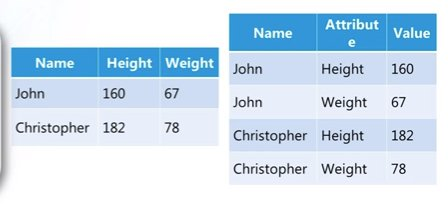

**Wide format** is where we have a single row for every data point with multiple columns to hold the values of various attributes.

**Long format** is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

In [ ]:
# left one is wide data format

# and right side is lond data

In [ ]:
# melt

# it convert our wide data format to long data format

pd.DataFrame({'cse':[120]})

,cse
0,120


In [ ]:
pd.DataFrame({'cse':[120]}).melt()

,variable,value
0,cse,120


In [ ]:
# melt -> branch with year

pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]})

,cse,ece,mech
0,120,100,50


In [ ]:
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]}).melt()

,variable,value
0,cse,120
1,ece,100
2,mech,50


In [ ]:
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]}).melt(var_name='branch',value_name='num_students')

,branch,num_students
0,cse,120
1,ece,100
2,mech,50


In [ ]:
pd.DataFrame({
    'branch' : ['cse' , 'ece ' , 'mech'],
    '2020' : [100 , 150 , 60],
    '2021' : [120 , 130 , 80],
    '2022' : [150 , 140 , 70]
})

,branch,2020,2021,2022
0,cse,100,120,150
1,ece,150,130,140
2,mech,60,80,70


In [ ]:
pd.DataFrame({
    'branch' : ['cse' , 'ece ' , 'mech'],
    '2020' : [100 , 150 , 60],
    '2021' : [120 , 130 , 80],
    '2022' : [150 , 140 , 70]
}).melt(id_vars=['branch'] , var_name='year' , value_name='students')

# id_vars=[] --> using these parameter we can stop columns from becoming rows

,branch,year,students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,80
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [ ]:
# working with real data

In [ ]:
death = pd.read_csv('time_series_covid19_deaths_global.csv')

death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [ ]:
confirm = pd.read_csv('time_series_covid19_confirmed_global.csv')

confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [ ]:
# we have to make 4 column dataframe from these two datasets

# which contains some columns

# 1st column --> country
# 2nd column --> date
# 3rd column --> confirm
# 4th column --> deaths

In [ ]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [ ]:
# we have to only convert the dates columns into rows

death = death.melt(id_vars=['Province/State' , 'Country/Region' , 'Lat' , 'Long'] , var_name='Dates' , value_name='num_Deaths').head(150000)

In [ ]:
# we have to only convert the dates columns into rows

confirm = confirm.melt(id_vars=['Province/State' , 'Country/Region' , 'Lat' , 'Long'] , var_name='Dates' , value_name='num_cases').head(150000)

In [ ]:
death.head()

,Province/State,Country/Region,Lat,Long,Dates,num_Deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [ ]:
confirm.head()

,Province/State,Country/Region,Lat,Long,Dates,num_cases
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [ ]:
new_df = confirm.merge(death , on=['Province/State' , 'Country/Region' , 'Lat' , 'Long' , 'Dates'])

In [ ]:
new_df

,Province/State,Country/Region,Lat,Long,Dates,num_cases,num_Deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0
...,...,...,...,...,...,...,...
149995,NaN,Angola,-11.20270,17.873900,6/24/21,38091,881
149996,NaN,Antarctica,-71.94990,23.347000,6/24/21,0,0
149997,NaN,Antigua and Barbuda,17.06080,-61.796400,6/24/21,1263,42
149998,NaN,Argentina,-38.41610,-63.616700,6/24/21,4350564,91438


#### pivot

it convert long data format to wide data format

The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [11]:
import pandas as pd

import numpy as np

import seaborn as sns

In [12]:
df = sns.load_dataset('tips')

df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [13]:
# what is total bill on the basis of gender 
# all male 
# all female 


df.groupby('sex')[['total_bill']].mean()

,total_bill
sex,
Male,20.744076
Female,18.056897


In [14]:
# find out total bill on the basis of gender and they are smoker or not

df.groupby(['sex' , 'smoker'])[['total_bill']].mean()

total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [15]:
df.groupby(['sex' , 'smoker'])[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [16]:
# rather than using above code we use pivot and we get same output 
# above code is more in lines means big 

In [17]:
df.pivot_table(index = 'sex' , columns = 'smoker' , values='total_bill')

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [18]:
df.pivot_table(index = 'sex' , columns = 'smoker' , values='total_bill' , aggfunc='count')

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [19]:
# if we not specify value

df.pivot_table(index = 'sex' , columns = 'smoker')

C:\Users\AKASH\AppData\Local\Temp\ipykernel_11036\1014170925.py:3: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index = 'sex' , columns = 'smoker')


size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [20]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [21]:
# we can do analysis in 4 dimensions also 

df.pivot_table(index=['sex' , 'smoker'] , columns=['day' , 'time'] , values = 'total_bill')

day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [22]:
df.pivot_table(index=['sex' , 'smoker'] , columns=['day' , 'time'])

size                                                   tip  \
day                Thur              Fri              Sat       Sun      Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner     Lunch   
sex    smoker                                                                   
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  3.058000   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  2.941500   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  2.990000   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  2.437083   

                                                      total_bill         \
day                    Fri              Sat       Sun       Thur          
time          Dinner Lunch Dinner    Dinner    Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes       NaN  1.90  3.246  2.879259  3.521333  19.171000    NaN   
       No        NaN   NaN  2.500  3.256563  3.115349  18.486500    NaN   
Female Yes       NaN  2.66  2.700  2.868667  3.500000  19.218571    NaN   
       No        3.0  3.00  3.250  2.724615  3.329286  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286

In [23]:
# margins

df.pivot_table(index = 'sex' , columns = 'smoker' , values='total_bill' , aggfunc='sum')

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [24]:
df.pivot_table(index = 'sex' , columns = 'smoker' , values='total_bill' , aggfunc='sum' , margins=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [25]:
# plotting graphs using pivot


df1 = pd.read_csv("expense_data.csv")
df1

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [26]:
df1['Category']

0                Food
1               Other
2                Food
3      Transportation
4                Food
            ...      
272              Food
273              Food
274    Transportation
275              Food
276             Other
Name: Category, Length: 277, dtype: object

In [27]:
df1.info()

# here we can see the data column is string object 

# so we have to convert string dates in to the actual data format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [29]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [40]:
df1['month'] = df1['Date'].dt.month_name()

# using that we can extract only month

In [42]:
df1.pivot_table(index='month' , columns='Category' , values = 'INR' , aggfunc='sum')

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,NaN,6440.72,NaN,4800.0,1790.0,NaN,NaN,400.0,513.72,914.0
February,NaN,798.0,NaN,NaN,5579.85,NaN,2808.0,20000.0,NaN,NaN,NaN,1800.00,5078.8
January,1000.0,NaN,NaN,1400.0,9112.51,NaN,4580.0,13178.0,NaN,8000.0,NaN,200.00,2850.0
March,NaN,NaN,NaN,NaN,195.00,NaN,NaN,900.0,NaN,NaN,NaN,NaN,30.0
November,2000.0,NaN,NaN,NaN,3174.40,115.0,NaN,2000.0,3.0,NaN,NaN,NaN,331.0


<Axes: xlabel='month'>

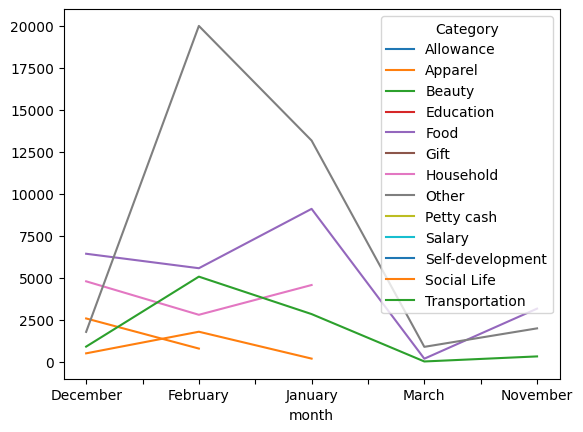

In [43]:
df1.pivot_table(index='month' , columns='Category' , values = 'INR' , aggfunc='sum').plot()

<Axes: xlabel='month'>

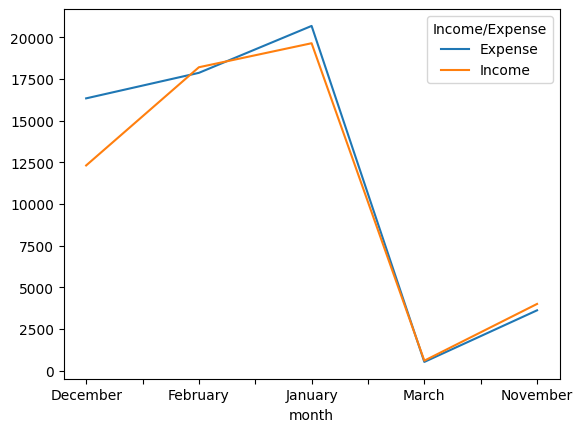

In [45]:
df1.pivot_table(index='month' ,  columns='Income/Expense' , values = 'INR' , aggfunc='sum').plot()

<Axes: xlabel='month'>

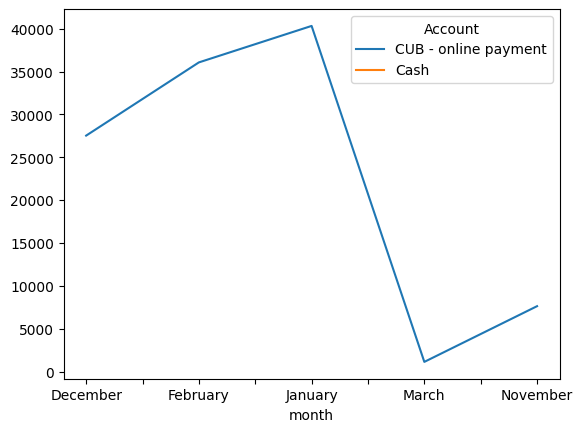

In [46]:
df1.pivot_table(index='month' ,  columns='Account' , values = 'INR' , aggfunc='sum').plot()